# Import Some Package
To facilitate the use of some matrix and symbolic operations, we need to import numpy and sympy.

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint as inte
import sympy as sym

from matplotlib import animation
from matplotlib.animation import PillowWriter

import math
from math import e
from math import pi

# Define Parameters

In [218]:
t, m, g, k, l = sym.symbols('t, m, g, k, l')
r, theta = sym.symbols(r'r \theta', cls=sym.Function)

# System Coordinaates

In [219]:
r = r(t)
theta = theta(t)
r_d = sym.diff(r, t)
theta_d = sym.diff(theta, t)
r_dd = sym.diff(r_d, t)
theta_dd = sym.diff(theta_d, t)

In [220]:
theta_dd

Derivative(\theta(t), (t, 2))

# Coordinates Transformation

In [221]:
x = r * sym.cos(theta)
y = r * sym.sin(theta)

x_d = sym.diff(x, t)
y_d = sym.diff(y, t)

In [222]:
y

r(t)*sin(\theta(t))

# Lagrangian

In [223]:
T = 0.5*m*(x_d**2 + y_d**2);
# T = 1/2 * m * (x_dot^2 + y_dot^2);

V = m*g*y + 0.5*k*(r-l)**2;
# V = mgz + 1/2 * k * (r-l)^2 ;

L = T - V;

In [224]:
L

-g*m*r(t)*sin(\theta(t)) - 0.5*k*(-l + r(t))**2 + 0.5*m*((-r(t)*sin(\theta(t))*Derivative(\theta(t), t) + cos(\theta(t))*Derivative(r(t), t))**2 + (r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))**2)

# Lagrangian Equation

In [225]:
LE1 = sym.diff(L, r) - sym.diff(sym.diff(L, r_d), t).simplify()
LE2 = sym.diff(L, theta) - sym.diff(sym.diff(L, theta_d), t).simplify()

In [226]:
LE1

-g*m*sin(\theta(t)) - 0.5*k*(-2*l + 2*r(t)) + 0.5*m*(-2*(-r(t)*sin(\theta(t))*Derivative(\theta(t), t) + cos(\theta(t))*Derivative(r(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*(r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))*cos(\theta(t))*Derivative(\theta(t), t)) - 1.0*m*Derivative(r(t), (t, 2))

Find \ddot{r} and \ddot{𝜃}

In [227]:
sols = sym.solve([LE1, LE2], (r_dd, theta_dd), simplify=False, rational=False)

In [228]:
sols

{Derivative(r(t), (t, 2)): -1.0*g*sin(\theta(t)) + 1.0*k*l/m - 1.0*k*r(t)/m + 1.0*r(t)*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + 1.0*r(t)*cos(\theta(t))**2*Derivative(\theta(t), t)**2,
 Derivative(\theta(t), (t, 2)): -1.0*g*cos(\theta(t))/r(t) - 2.0*Derivative(\theta(t), t)*Derivative(r(t), t)/r(t)}

# State Space

In [229]:
d2rdt2_f = sym.lambdify((t, m, g, k, l, r, theta, r_d, theta_d), sols[r_dd])
d2thetadt2_f = sym.lambdify((t, m, g, k, l, r, theta, r_d, theta_d), sols[theta_dd])
drdt_f = sym.lambdify(r_d, r_d)
dthetadt_f = sym.lambdify(theta_d, theta_d)

In [230]:
def dSdt(S, t, m, g, k, l):
    r, r_d, theta, theta_d = S
    return [
        drdt_f(r_d),
        d2rdt2_f(t, m, g, k, l, r, theta, r_d, theta_d),
        dthetadt_f(theta_d),
        d2thetadt2_f(t, m, g, k, l, r, theta, r_d, theta_d),
    ]

# Simulation

In [231]:
t = np.linspace(0, 10, 10001) # s
g = 9.81 #m/s^2
k = 200 # N/m
m = 2 # kg
l = 1 # m

ans = inte(dSdt, y0=[1, 0, -60*pi/180, 0], t=t, args=(m, g, k, l))

In [232]:
ans

array([[ 1.        ,  0.        , -1.04719755,  0.        ],
       [ 1.00000425,  0.00849557, -1.0472    , -0.00490496],
       [ 1.00001699,  0.01699037, -1.04720736, -0.00980966],
       ...,
       [ 1.10429265,  0.89316058, -2.01186434,  0.76616398],
       [ 1.10518534,  0.89221007, -2.0110969 ,  0.76871153],
       [ 1.10607704,  0.89117841, -2.01032692,  0.77124812]])

In [233]:
r_result = ans.T[0]
theta_result = ans.T[2]

# Figure

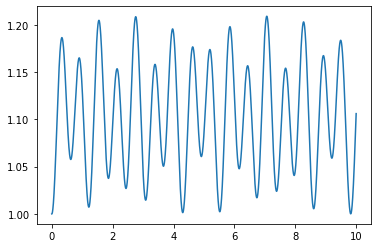

In [234]:
plt.plot(t, r_result)

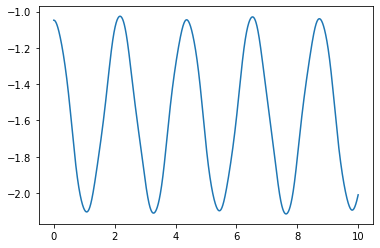

In [235]:
plt.plot(t, theta_result)